# Data Analysis

In [1]:
import pandas as pd                             #importing the required modules/packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import norm

In [2]:
df = pd.read_csv('bike_buyers_data.csv')             #reading the csv file

In [3]:
df.head()         #Inspecting the first 5 rows

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Bike Used In Years
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,2.0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,2.0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,2.0
3,24381,Single,NaN,70000,0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,2.0
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0.0,NaN,Europe,36.0,Yes,2.0


In [4]:
#Making a list of missing value types
#we are doing this because the compiler can identify only NaN as missing..
missing_values=["n/a","na","--"]
df=pd.read_csv('bike_buyers_data.csv',na_values=missing_values)
df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Bike Used In Years
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,2.0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,2.0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,2.0
3,24381,Single,NaN,70000,0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,2.0
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0.0,NaN,Europe,36.0,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,NaN,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,5.0
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,NaN,Yes,5.0
997,11809,Married,NaN,60000,2,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes,5.0
998,19664,Single,Male,100000,3,Bachelors,Management,NaN,3.0,NaN,North America,38.0,No,5.0


In [5]:
df.shape          #to see number of  rows and cols our data contains

(1000, 14)

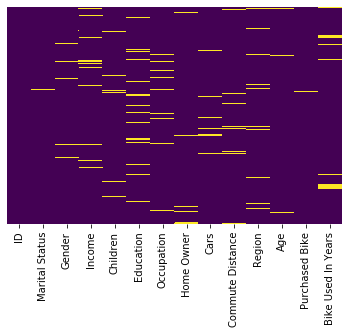

In [6]:
## to see the null values using heatmaps
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.isnull().values.any()    #missing values values are present

True

In [8]:
df.isnull().sum().sum()       #total count of missing values

459

# BEFORE DATA CLEANING

In [9]:
df.isnull().sum()     #checking missing values
                      #we have so many missing values lets start to clean them up!!

ID                     0
Marital Status        16
Gender                23
Income                41
Children              21
Education             61
Occupation            56
Home Owner            27
Cars                  35
Commute Distance      45
Region                52
Age                   25
Purchased Bike         3
Bike Used In Years    54
dtype: int64

In [10]:
df.dtypes   #checking the datatypes of our data

ID                      int64
Marital Status         object
Gender                 object
Income                 object
Children               object
Education              object
Occupation             object
Home Owner             object
Cars                  float64
Commute Distance       object
Region                 object
Age                   float64
Purchased Bike         object
Bike Used In Years    float64
dtype: object

# DATA CLEANING

METHOD 1:-

In [11]:
# drop all rows with all NaN         
df = df.dropna(axis = 0, how ='all')
# drop all columns with all NaN
df = df.dropna(axis = 1, how ='all')

 METHOD 2:-

In [12]:
#checking for any inconsistent data in gender column

df.Gender=df.Gender.astype(str)
list_Gender=["Male","male","Female","female"]
count_01=0
for i in df['Gender']:
    if(i in list_Gender):
        df.loc[count_01,'Gender']=i
    else:
        df.loc[count_01,'Gender']="unknown"
    count_01+=1
#checking for any inconsistent data in Purchased Bike column
for count ,row in df.iterrows():
    if (row['Purchased Bike']=='yes' or row['Purchased Bike']==0):
        df.loc[count,'Purchased Bike']='Yes'

In [13]:
#I have created a code which traverse through both columns and checks for mismatching values based on condition and fixes it.
#checking for the mismatching values in two columns and filling it appropriate value.
for count , row in df.iterrows():
    if(row['Marital Status'] == "Single" and row['Children'] != 0.0):
        df.loc[count,'Children']=0.0
    else:
         df.loc[count,'Children']=row['Children']
        

In [14]:
#checking for the mismatching values in two columns and filling it with appropriate value.
for count , row in df.iterrows():
    if(row['Purchased Bike'] == "No" and row['Bike Used In Years'] != 0.0):
        df.loc[count,'Bike Used In Years']=0.0
    else:
         df.loc[count,'Bike Used In Years']=row['Bike Used In Years']

METHOD 3:-

In [15]:
#I have designed a function that allows me to check for invalid data types in a column.
#Suppose I wish to ensure that all values in the ‘Income’,'Children' column are of type int/float. I will use the following:
#this func also deletes all other char,strings,'/'etc..

def make_int(i):
    try:
        return int(i)
    except:
        return np.nan

# apply make_int function to the entire series using map

df['Income'] = df['Income'].map(make_int)
df['Children']=df['Children'].map(make_int)

print(df['Income'])
print(df['Children'])



0       40000.0
1       30000.0
2       80000.0
3       70000.0
4       30000.0
         ...   
995     60000.0
996     70000.0
997     60000.0
998    100000.0
999     60000.0
Name: Income, Length: 1000, dtype: float64
0      1.0
1      3.0
2      5.0
3      0.0
4      0.0
      ... 
995    2.0
996    0.0
997    2.0
998    0.0
999    0.0
Name: Children, Length: 1000, dtype: float64


In [16]:
df.dtypes

ID                      int64
Marital Status         object
Gender                 object
Income                float64
Children              float64
Education              object
Occupation             object
Home Owner             object
Cars                  float64
Commute Distance       object
Region                 object
Age                   float64
Purchased Bike         object
Bike Used In Years    float64
dtype: object

METHOD 4:-

In [17]:
#Replacing NaNs with a single constant value
#We will use fillna() to replace missing values in the 'Purchased Bike' column with 0.

df['Purchased Bike'].fillna(0, inplace=True)

METHOD 5:-

In [18]:
#Using the interpolate method
#interpolate() function is used to fill NaN values using various interpolation techniques. 

df['Children'].interpolate(method='linear', direction = 'forward', inplace=True) 
df['Cars'].interpolate(method='linear', direction = 'forward', inplace=True) 


METHOD 6:-

In [19]:
#Replacing NaNs using Median/Mean of the column
# using median
df['Income'].fillna(df['Income'].median(), inplace=True)

#using mean
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

METHOD 7:-

In [20]:
#Replacing NaNs with the value from the previous row or the next row
#This is a common approach when filling missing values.

#We use method = 'pad’ for taking values from the previous row.
df['Region'].fillna(method='pad', inplace=True)

#We use method = 'bfill’ for taking values from the next row.
df['Marital Status'].fillna(method='bfill', inplace=True)

METHOD 8:-

In [21]:
#checking for inconsistent data in Bike Used In Years
count_02=0
for j in df["Bike Used In Years"]:
    if(j<0):
        df.loc[count_02,'Bike Used In Years']=np.NaN
    count_02+=1
#dropping rows which has nan values in Bike Used In Years
df.dropna(subset=['Bike Used In Years'],inplace=True)

METHOD 9:-

In [22]:
#cleaning the Education and Commute Distannce column
df['Education'].fillna("other",inplace=True)
df['Commute Distance'].fillna("10+ Miles",inplace=True)
df.isin(['\\']).sum(axis=0)
df['Commute Distance'] = df['Commute Distance'].apply(lambda x: str(x).replace('\\', '') if '\\' in str(x) else str(x))

METHOD 10:-

In [23]:
# Filling the missing categorical values with mode

df['Occupation'].fillna(str(df['Occupation'].mode().values[0]), inplace=True)
df['Home Owner'].fillna(str(df['Home Owner'].mode().values[0]), inplace=True)

In [24]:
#filling in  the inconsitent decimal values with their ceil values 
import math
for count ,row in df.iterrows():
    df.loc[count,'Children']=math.ceil(row['Children'])
    df.loc[count,'Cars']=math.ceil(row['Cars'])
    df.loc[count,'Bike Used In Years']=math.ceil(row['Bike Used In Years'])

In [25]:
#Filling the purchased bike columns with inconsistent vlaues with a yes or no
import random
lsit=['Yes','No']
a=random.choice(lsit)
for count ,row in df.iterrows():
    if (row['Purchased Bike']=='yes' or row['Purchased Bike']==0):
        df.loc[count,'Purchased Bike']=a

# AFTER DATA CLEANING

In [26]:
df.isnull().sum()   #we dont have any missing/inconsistent/NaN values 

ID                    0
Marital Status        0
Gender                0
Income                0
Children              0
Education             0
Occupation            0
Home Owner            0
Cars                  0
Commute Distance      0
Region                0
Age                   0
Purchased Bike        0
Bike Used In Years    0
dtype: int64

In [27]:
df   # data has been cleaned completely

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Bike Used In Years
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,0.0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,0.0
3,24381,Single,unknown,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,2.0
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,10+ Miles,Europe,36.0,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,other,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,5.0
996,28672,Single,Male,70000.0,0.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,44.0,Yes,5.0
997,11809,Married,unknown,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes,5.0
998,19664,Single,Male,100000.0,0.0,Bachelors,Management,Yes,3.0,10+ Miles,North America,38.0,No,0.0


In [28]:
#so we have our final cleaned data and stored it in a new csv file for later use ...
data=df.to_csv('cleaned_data.csv',index=False)
df7 = pd.read_csv('cleaned_data.csv')     
df7

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Bike Used In Years
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,0.0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,0.0
3,24381,Single,unknown,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,2.0
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,10+ Miles,Europe,36.0,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,23731,Married,Male,60000.0,2.0,other,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,5.0
967,28672,Single,Male,70000.0,0.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,44.0,Yes,5.0
968,11809,Married,unknown,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes,5.0
969,19664,Single,Male,100000.0,0.0,Bachelors,Management,Yes,3.0,10+ Miles,North America,38.0,No,0.0


# EXPLORATORY DATA ANALYSIS
# GRAPH VISUALIZATION:-

In [29]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!= 'O']   #printing all numerical features
print("Number of numerical variables is ",len(numerical_features))
df[numerical_features].head()

Number of numerical variables is  6


,ID,Income,Children,Cars,Age,Bike Used In Years
0,12496,40000.0,1.0,0.0,42.0,0.0
1,24107,30000.0,3.0,1.0,43.0,0.0
2,14177,80000.0,5.0,2.0,60.0,0.0
3,24381,70000.0,0.0,1.0,41.0,2.0
4,25597,30000.0,0.0,0.0,36.0,2.0


OUTLIERS CHECKING:-

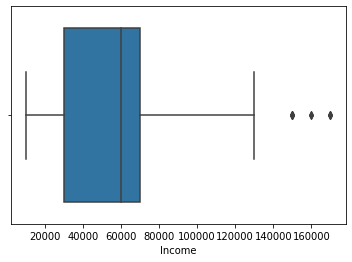

In [30]:
#checking for outliers in Income column
sns.boxplot(x=df['Income'])

0.7635214530849651
20000.0
90000.0


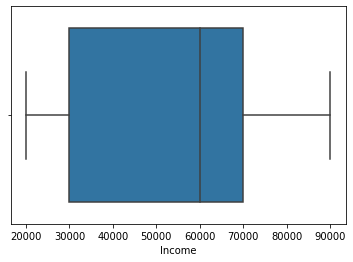

In [31]:
#It has 3 outlier,so lets filter and remove it
print(df['Income'].skew())
df['Income'].describe()
print(df['Income'].quantile(0.10))
print(df['Income'].quantile(0.90))
df['Income']=np.where(df['Income'] <20000.0, 20000.0,df['Income'])
df['Income']=np.where(df['Income'] >90000.0, 90000.0,df['Income'])
df['Income'].skew()
df['Income'].describe()
sns.boxplot(x=df['Income'])

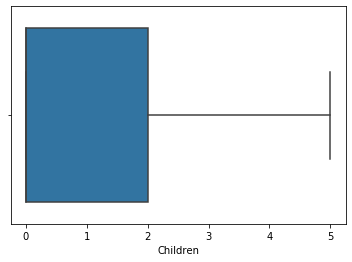

In [32]:
#checking for outliers in Children column
sns.boxplot(x=df['Children'])
#no outliers

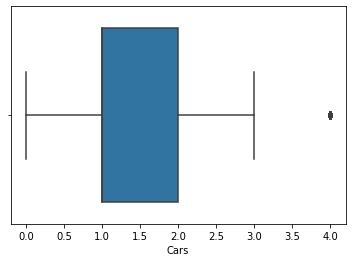

In [33]:
#checking for outliers in Cars column
sns.boxplot(x=df['Cars'])

0.40948720309647885
0.0
3.0


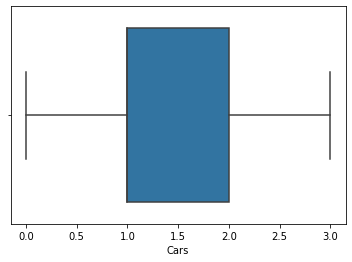

In [34]:
#It has 1 outlier,so lets filter and remove it
print(df['Cars'].skew())
df['Cars'].describe()
print(df['Cars'].quantile(0.10))
print(df['Cars'].quantile(0.90))
df['Cars']=np.where(df['Cars'] <0.0, 0.0,df['Cars'])
df['Cars']=np.where(df['Cars'] >3.0, 3.0,df['Cars'])
df['Cars'].skew()
df['Cars'].describe()
sns.boxplot(x=df['Cars'])

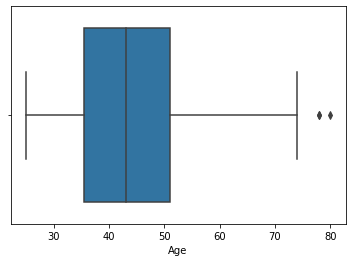

In [35]:
#checking for outliers in Age column
sns.boxplot(x=df['Age'])


0.49171150129816127
30.0
61.0


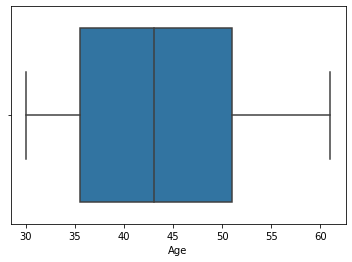

In [36]:
#It has 2 outlier,so lets filter and remove it
print(df['Age'].skew())
df['Age'].describe()
print(df['Age'].quantile(0.10))
print(df['Age'].quantile(0.90))
df['Age']=np.where(df['Age'] <30.0, 30.0,df['Age'])
df['Age']=np.where(df['Age'] >61.0, 61.0,df['Age'])
df['Age'].skew()
df['Age'].describe()
sns.boxplot(x=df['Age'])

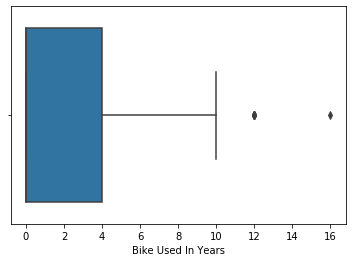

In [37]:
#checking for outliers in Bike Used In Years column
sns.boxplot(x=df['Bike Used In Years'])

1.1704295295798928
0.0
5.0


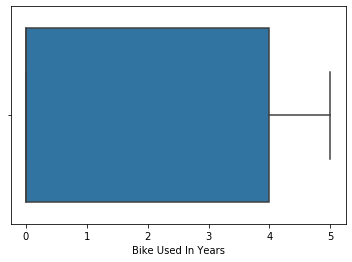

In [38]:
#It has 2 outlier,so lets filter and remove it
print(df['Bike Used In Years'].skew())
df['Bike Used In Years'].describe()
print(df['Bike Used In Years'].quantile(0.10))
print(df['Bike Used In Years'].quantile(0.90))
df['Bike Used In Years']=np.where(df['Bike Used In Years'] <0.0,  0.0,df['Bike Used In Years'])
df['Bike Used In Years']=np.where(df['Bike Used In Years'] >5.0,  5.0,df['Bike Used In Years'])
df['Bike Used In Years'].skew()
df['Bike Used In Years'].describe()
sns.boxplot(x=df['Bike Used In Years'])

In [39]:
grp = df.groupby('Age')                                        #categorising and visualising our data
x = grp['Income'].agg(np.mean)
y = grp['Cars'].agg(np.sum)
z = grp['Bike Used In Years'].agg(np.mean)

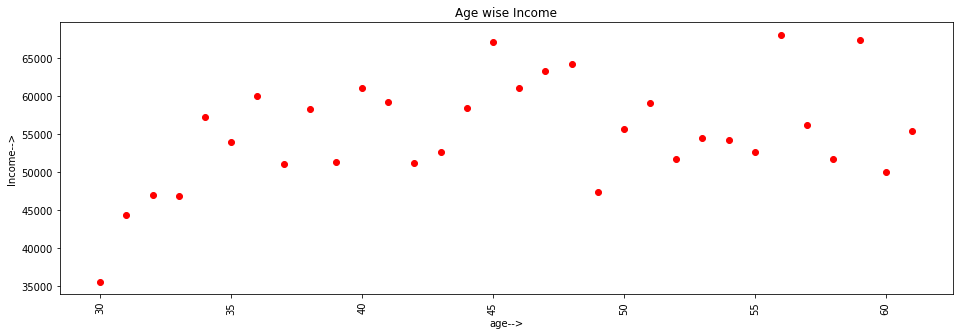

In [40]:
plt.figure(figsize=(16,5))                         #data visualising using scatterplot                
plt.plot(x,'ro', color='r')
plt.xticks(rotation=90)
plt.title('Age wise Income')
plt.xlabel('age-->')
plt.ylabel('Income-->')
plt.show()

Text(0.5, 1.0, 'The frequency of each category in the dataset')

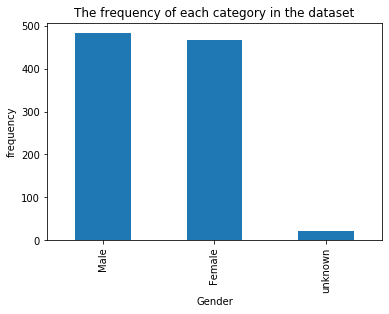

In [41]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')                                                  #data visualising using bar graphs
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0.5, 1.0, 'The frequency of each category in the dataset')

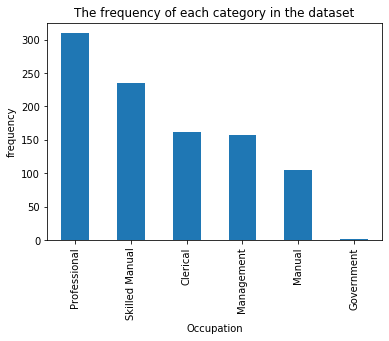

In [42]:
df["Occupation"] = df["Occupation"].replace(to_replace ="#NAME?", 
                 value ="Government")

df['Occupation'].value_counts().plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0.5, 1.0, 'The frequency of each category in the dataset')

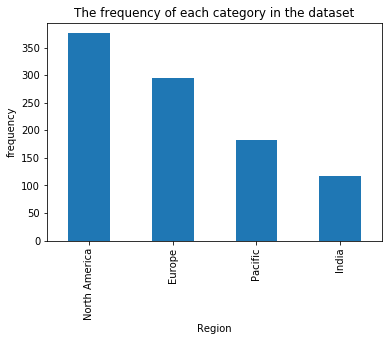

In [43]:
df['Region'].value_counts().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0.5, 1.0, 'The frequency of each category in the dataset')

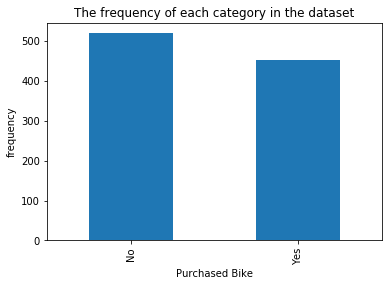

In [44]:
df['Purchased Bike'].value_counts().plot(kind='bar')
plt.xlabel('Purchased Bike')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

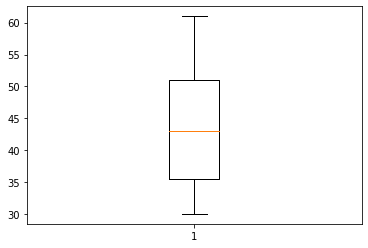

In [45]:
plt.boxplot(df['Age'])                      #data visualising using boxplot
plt.show()

Text(0.5, 1.0, 'The frequency of each category in the dataset')

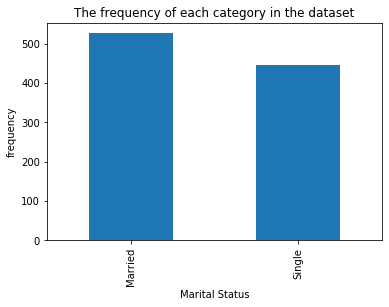

In [46]:
df['Marital Status'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0.5, 1.0, 'The frequency of each category in the dataset')

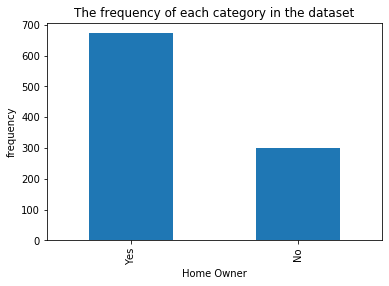

In [47]:
df['Home Owner'].value_counts().plot(kind='bar')
plt.xlabel('Home Owner')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0.5, 1.0, 'The frequency of each category in the dataset')

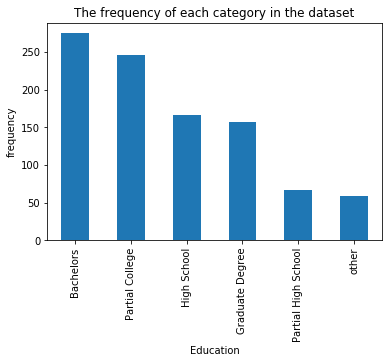

In [48]:
df['Education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

Text(0.5, 1.0, 'The frequency of each category in the dataset')

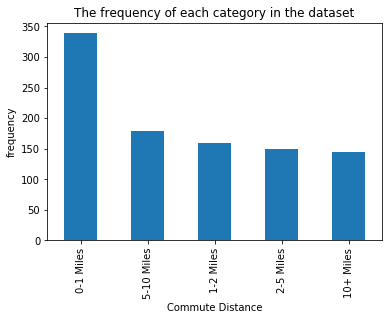

In [49]:
df['Commute Distance'].value_counts().plot(kind='bar')
plt.xlabel('Commute Distance')
plt.ylabel('frequency')
plt.title('The frequency of each category in the dataset')

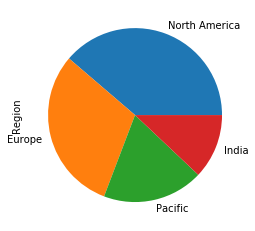

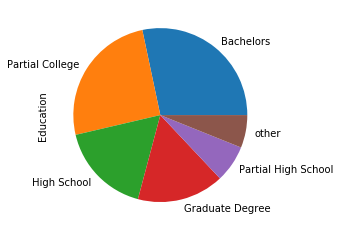

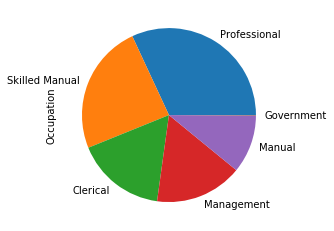

In [50]:
df.Region.value_counts()                      
df.Region.value_counts().plot.pie()                   #piechart for data visualization
plt.show()
df.Education.value_counts()
df.Education.value_counts().plot.pie()
plt.show()
df.Occupation.value_counts()
df.Occupation.value_counts().plot.pie()
plt.show()

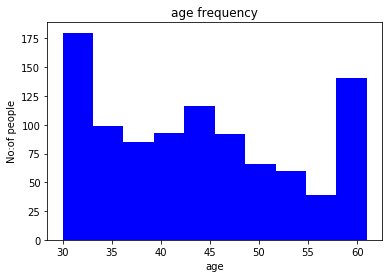

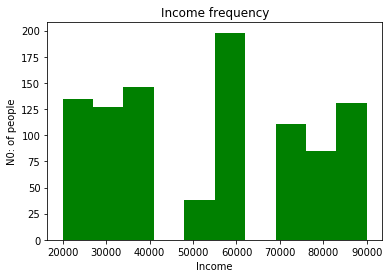

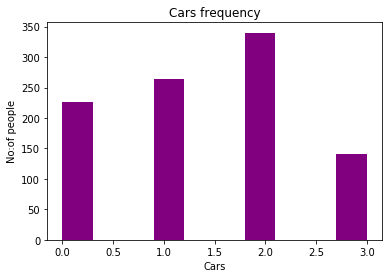

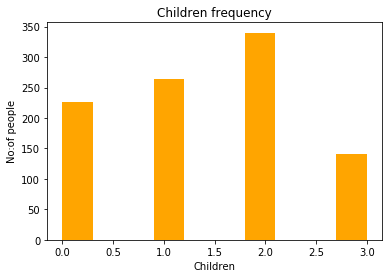

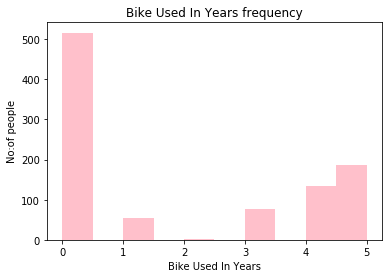

In [51]:
n_bins = [10,20,30,40,50,60,70,80,90,100]     #no of bins 
bin_heights, bins, patches = plt.hist(df["Age"], facecolor='blue')
plt.title('age frequency')
plt.ylabel('No:of people')
plt.xlabel('age')                                                                 #HISTOGRAM DATA VISUALIZATION
plt.show()
n_bins=[10000,20000,30000,40000,50000,60000,70000,80000,90000]
bin_heights, bins, patches = plt.hist(df["Income"], facecolor='green')
plt.title('Income frequency')
plt.ylabel('N0: of people')
plt.xlabel('Income')
plt.show()
n_bins=[1,2,3,4,5,6,7,8,9,10]
bin_heights, bins, patches = plt.hist(df["Cars"], facecolor='purple')
plt.title('Cars frequency')
plt.ylabel('No:of people')
plt.xlabel('Cars')
plt.show()
n_bins=[1,2,3,4,5,6,7,8,9,10]
bin_heights, bins, patches = plt.hist(df["Cars"], facecolor='orange')
plt.title('Children frequency')
plt.ylabel('No:of people')
plt.xlabel('Children')
plt.show()
n_bins=[1,2,3,4,5,6,7,8,9,10]
bin_heights, bins, patches = plt.hist(df["Bike Used In Years"], facecolor='pink')
plt.title('Bike Used In Years frequency')
plt.ylabel('No:of people')
plt.xlabel('Bike Used In Years')
plt.show()


# STANDARDISATION AND NORMALISATION

In [52]:
import statistics                                              #mean and variance finding
agemean = statistics.mean(df["Age"])
agevar = statistics.variance(df["Age"])
print(agemean,agevar)

43.91555097837281 98.13306719610986


In [53]:
incomemean = statistics.mean(df["Income"])
incomevar = statistics.variance(df["Income"])
print(incomemean,incomevar)

54057.672502574664 537332752.9276865


In [54]:
df.mean()   #gives the mean of all numerical data type columns

ID                    19953.387230
Income                54057.672503
Children                  1.134912
Cars                      1.407827
Age                      43.915551
Bike Used In Years        1.812564
dtype: float64

In [55]:
bikesusedmean = statistics.mean(df["Bike Used In Years"])
bikesusedvar = statistics.variance(df["Bike Used In Years"])
print(bikesusedmean,bikesusedvar)

1.8125643666323379 4.511223417244418


In [56]:
df.std()    #gives the standard deviation of all numerical data type columns

ID                     5353.528605
Income                23180.439015
Children                  1.576675
Cars                      0.999227
Age                       9.906214
Bike Used In Years        2.123964
dtype: float64

In [57]:
carsmean = statistics.mean(df["Cars"])
carsvar = statistics.variance(df["Cars"])
print(carsmean,carsvar)

1.407826982492276 0.9984541391062461


In [58]:
childrenmean = statistics.mean(df["Children"])
childrenvar = statistics.variance(df["Children"])
print(childrenmean,childrenvar)

1.1349124613800206 2.485903574803317


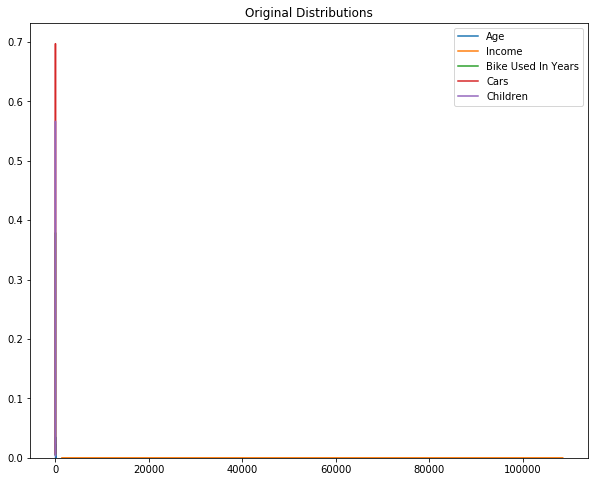

In [59]:
from sklearn import preprocessing
import seaborn as sns                                           #orginal distributions
fig, (ax1) = plt.subplots(ncols=1, figsize=(10,8))              #before any stadardization and normalization
ax1.set_title('Original Distributions')
sns.kdeplot(df['Age'], ax=ax1)
sns.kdeplot(df['Income'], ax=ax1)
sns.kdeplot(df['Bike Used In Years'], ax=ax1)
sns.kdeplot(df['Cars'], ax=ax1)
sns.kdeplot(df['Children'], ax=ax1)


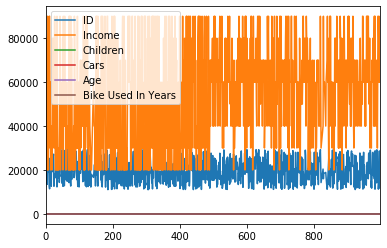

In [60]:
df.plot()

In [61]:
for col in df.columns: 
    print(col)                  #display all columns

ID
Marital Status
Gender
Income
Children
Education
Occupation
Home Owner
Cars
Commute Distance
Region
Age
Purchased Bike
Bike Used In Years


In [62]:

df.info()                #checking the datatype of features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 999
Data columns (total 14 columns):
ID                    971 non-null int64
Marital Status        971 non-null object
Gender                971 non-null object
Income                971 non-null float64
Children              971 non-null float64
Education             971 non-null object
Occupation            971 non-null object
Home Owner            971 non-null object
Cars                  971 non-null float64
Commute Distance      971 non-null object
Region                971 non-null object
Age                   971 non-null float64
Purchased Bike        971 non-null object
Bike Used In Years    971 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 153.8+ KB


In [63]:
df1 = df.drop(['ID','Marital Status','Gender','Education','Occupation',                  #dropping the object features
               'Home Owner','Commute Distance','Region','Purchased Bike'],axis = 1)

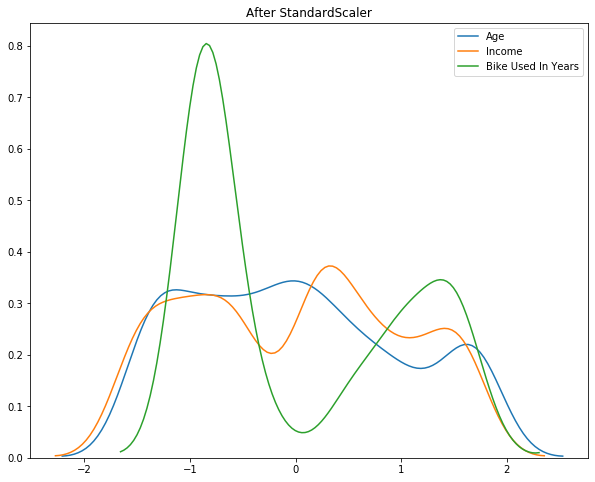

In [64]:
col_names = list(df1.columns)                                              #standardisation
s_scaler = preprocessing.StandardScaler()
df1_s = s_scaler.fit_transform(df1)

df1_s = pd.DataFrame(df1_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df1_s['Age'], ax=ax1)
sns.kdeplot(df1_s['Income'], ax=ax1)
sns.kdeplot(df1_s['Bike Used In Years'], ax=ax1)



In [65]:
df1_s.info()                                               #info of numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 5 columns):
Income                971 non-null float64
Children              971 non-null float64
Cars                  971 non-null float64
Age                   971 non-null float64
Bike Used In Years    971 non-null float64
dtypes: float64(5)
memory usage: 38.1 KB


In [66]:
mins = [df1_s[col].min() for col in df1_s.columns]                   #mins
mins

[-1.4699990565125147,
 -0.7201848363928914,
 -1.4096424565432422,
 -1.4054534564230088,
 -0.8538272627739975]

In [67]:
maxs = [df1_s[col].max() for col in df1_s.columns]                #max
maxs

[1.551344634783392,
 2.452680300347116,
 1.5942262163978436,
 1.7255082436797873,
 1.5014746467531375]

In [68]:
df1_s.describe()           #describing thee data

,Income,Children,Cars,Age,Bike Used In Years
count,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02,9.710000e+02
mean,1.440088e-16,3.029960e-16,1.338899e-16,-1.861424e-16,-1.982623e-16
std,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00,1.000515e+00
min,-1.469999e+00,-7.201848e-01,-1.409642e+00,-1.405453e+00,-8.538273e-01
25%,-1.038379e+00,-7.201848e-01,-4.083529e-01,-8.499603e-01,-8.538273e-01
50%,2.564831e-01,-7.201848e-01,-4.083529e-01,-9.246952e-02,-8.538273e-01
75%,6.881036e-01,5.489612e-01,5.929367e-01,7.155206e-01,1.030414e+00
max,1.551345e+00,2.452680e+00,1.594226e+00,1.725508e+00,1.501475e+00


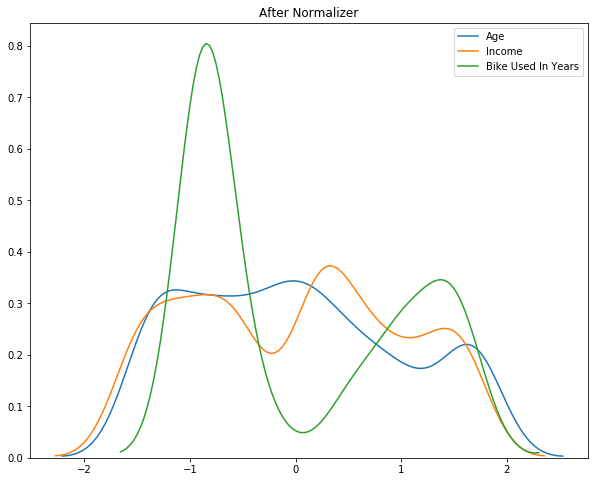

In [69]:
n_scaler = preprocessing.Normalizer()
df1_n = n_scaler.fit_transform(df1)                               #normalization

df1_n = pd.DataFrame(df1_n, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Normalizer')

sns.kdeplot(df1_s['Age'], ax=ax1)
sns.kdeplot(df1_s['Income'], ax=ax1)
sns.kdeplot(df1_s['Bike Used In Years'], ax=ax1)

In [70]:
df1_s                          #standardized result             mean=0 , variance/standard deviation=1

,Income,Children,Cars,Age,Bike Used In Years
0,-0.606758,-0.085612,-1.409642,-0.193468,-0.853827
1,-1.038379,1.183534,-0.408353,-0.092470,-0.853827
2,1.119724,2.452680,0.592937,1.624509,-0.853827
3,0.688104,-0.720185,-0.408353,-0.294467,0.088294
4,-1.038379,-0.720185,-1.409642,-0.799461,0.088294
...,...,...,...,...,...
966,0.256483,0.548961,0.592937,1.018517,1.501475
967,0.688104,-0.720185,-1.409642,0.008529,1.501475
968,0.256483,0.548961,-1.409642,-0.597463,1.501475
969,1.551345,-0.720185,1.594226,-0.597463,-0.853827


In [71]:
df1_n                                       #normalized result  [0,1] range

,Income,Children,Cars,Age,Bike Used In Years
0,0.999999,0.000025,0.000000,0.001050,0.000000
1,0.999999,0.000100,0.000033,0.001433,0.000000
2,1.000000,0.000062,0.000025,0.000750,0.000000
3,1.000000,0.000000,0.000014,0.000586,0.000029
4,0.999999,0.000000,0.000000,0.001200,0.000067
...,...,...,...,...,...
966,1.000000,0.000033,0.000033,0.000900,0.000083
967,1.000000,0.000000,0.000000,0.000629,0.000071
968,1.000000,0.000033,0.000000,0.000633,0.000083
969,1.000000,0.000000,0.000033,0.000422,0.000000


# CORRELATION

In [72]:
correlation_pearson = df1.corr(method="pearson");                     #from this technique we get to know which features ar
                                                                      #dependent on each other
print(correlation_pearson)

                      Income  Children      Cars       Age  Bike Used In Years
Income              1.000000  0.228719  0.333064  0.181927            0.018186
Children            0.228719  1.000000  0.194723  0.422372           -0.175304
Cars                0.333064  0.194723  1.000000  0.209803           -0.204879
Age                 0.181927  0.422372  0.209803  1.000000           -0.103207
Bike Used In Years  0.018186 -0.175304 -0.204879 -0.103207            1.000000


In [73]:
correlation_spearman = df1.corr(method='spearman')
print(correlation_spearman)

                      Income  Children      Cars       Age  Bike Used In Years
Income              1.000000  0.181472  0.318490  0.198968            0.042655
Children            0.181472  1.000000  0.122700  0.451124           -0.156152
Cars                0.318490  0.122700  1.000000  0.205614           -0.205569
Age                 0.198968  0.451124  0.205614  1.000000           -0.089224
Bike Used In Years  0.042655 -0.156152 -0.205569 -0.089224            1.000000


In [74]:
correlation_kendall = df1.corr(method='kendall')
print(correlation_kendall )

                      Income  Children      Cars       Age  Bike Used In Years
Income              1.000000  0.148349  0.256385  0.147995            0.035054
Children            0.148349  1.000000  0.105261  0.356888           -0.133170
Cars                0.256385  0.105261  1.000000  0.154903           -0.174642
Age                 0.147995  0.356888  0.154903  1.000000           -0.069132
Bike Used In Years  0.035054 -0.133170 -0.174642 -0.069132            1.000000


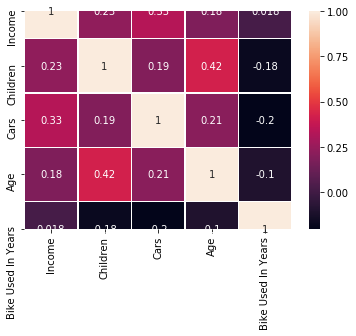

In [75]:
sns.heatmap(correlation_pearson,
              xticklabels=correlation_pearson.columns,                     #PEARSON METHOD
              yticklabels=correlation_pearson.columns,
              annot=True,
              linewidth=0.5)

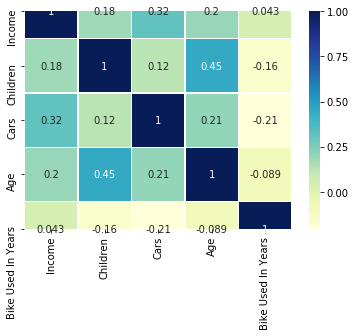

In [76]:
sns.heatmap(correlation_spearman,
              xticklabels=correlation_spearman.columns,
              yticklabels=correlation_spearman.columns,                                    #SPEARMAN METHOD
              cmap='YlGnBu',
              annot=True,
              linewidth=0.5)

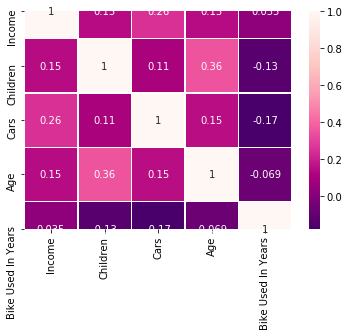

In [77]:
sns.heatmap(correlation_kendall,                                                           #KENDALL METHOD
              xticklabels=correlation_kendall.columns,                            
              yticklabels=correlation_kendall.columns,
              cmap='RdPu_r',
              annot=True,
              linewidth=0.5)

# HYPOTHESIS TESTING

In [78]:
#Hypothesis: Average age is 40 years
#H0: AvgAge = 40 and H1: AvgAge !=40
#mean = 43.8146240 and standard deviation = 9.735080 
#n = 971
#level of significance is 5% i.e, alpha=0.005 so critical value z=1.96 or -1.96
mean = 43.8146240
mu = 40
sd = 9.735080 
n=971
x= sd / np.sqrt(n)   #test statistics 
z = (mean - mu) / x
print(z)

12.210173273565847


#since value of z is greater than critical value we conclude that null hypothesis is rejected 

In [79]:
#Hypothesis: Average income is 54000 rupees
#H0: Avgincome = 54000/- and H1: AvgTemp != 54000/-
#mean =54057.672503 and standard deviation =23180.439015
#n = 971
#level of significance is 1% i.e, alpha=0.001 so critical value z=1.645 or -1.645
mean = 54057.672503
mu =54000
sd = 23180.439015
n=971
x= sd / np.sqrt(n)
z = (mean - mu) / x
print(z)

0.07752767472379793


#since vaue of z is lesser than critical value we conclude that null hypothesis is accepted

In [80]:
df   #Data set after all the processes

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Bike Used In Years
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,0.0
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,0.0
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,0.0
3,24381,Single,unknown,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,2.0
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,10+ Miles,Europe,36.0,Yes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,other,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes,5.0
996,28672,Single,Male,70000.0,0.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,44.0,Yes,5.0
997,11809,Married,unknown,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes,5.0
998,19664,Single,Male,90000.0,0.0,Bachelors,Management,Yes,3.0,10+ Miles,North America,38.0,No,0.0


#                                                 THANK YOU